<a href="https://colab.research.google.com/github/samhithabodangi/Organ-Rejection-Model/blob/main/Binary%20Classification%20Gene%20Expression/gse212160(KNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#data handling
import pandas as pd
import numpy as np
import io
from google.colab import files

#data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import MinMaxScaler

#feature selection
from sklearn.feature_selection import mutual_info_classif

#classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

#performance metrics
from sklearn.metrics import balanced_accuracy_score, accuracy_score, f1_score,precision_score, recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score

In [ ]:
uploaded = files.upload()

Saving Model.xlsx to Model.xlsx


In [ ]:
dataframe = pd.read_excel(io.BytesIO(uploaded.get('Model.xlsx')))

In [ ]:
print(dataframe.shape)

(969, 771)


In [ ]:
print(dataframe.columns[0:3])

Index(['ABCA1', 'ABCB1', 'ABCC2'], dtype='object')


# run

In [ ]:
dataframe.columns[-1]

'Class'

In [ ]:
datanul=dataframe.isnull().sum()
g=[i for i in datanul if i>0]

print('columns with missing values:%d'%len(g))

columns with missing values:0


In [ ]:
print(dataframe['Class'].value_counts())

No Rejection                 532
T cell-mediated Rejection    437
Name: Class, dtype: int64


In [ ]:
X=dataframe.iloc[:,0:-1]
y=dataframe.iloc[:,-1]

In [ ]:
X.shape

(969, 770)

In [ ]:
y.shape

(969,)

In [ ]:
label_encoder=LabelEncoder()
label_encoder.fit(y)
y_encoded=label_encoder.transform(y)
labels=label_encoder.classes_
classes=np.unique(y_encoded)

In [ ]:
labels

array(['No Rejection', 'T cell-mediated Rejection'], dtype=object)

In [ ]:
classes

array([0, 1])

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y_encoded,test_size=0.2,random_state=42)

In [ ]:
dataframe.iloc[:,0:10].describe()

,ABCA1,ABCB1,ABCC2,ABCE1,ABCF1,ACKR1,ACTA2,ACVR1,ACVRL1,ADAM8
count,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000
mean,7.960448,9.125012,7.590119,8.183138,7.546753,5.661911,10.178055,8.028559,7.945816,4.678013
std,0.545567,0.465732,0.951845,0.217213,0.141239,1.343907,0.732815,0.292742,0.303060,0.759101
min,6.336000,6.602000,3.599000,7.280000,6.974000,0.959000,7.388000,7.049000,6.796000,2.532000
25%,7.610000,8.856000,7.089000,8.047000,7.463000,4.893000,9.704000,7.830000,7.738000,4.140000
50%,7.915000,9.187000,7.719000,8.189000,7.547000,5.879000,10.169000,8.050000,7.930000,4.754000
75%,8.261000,9.469000,8.314000,8.327000,7.632000,6.629000,10.645000,8.236000,8.142000,5.217000
max,10.191000,10.273000,10.254000,8.937000,8.025000,8.567000,12.807000,8.928000,9.095000,6.733000


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
min_max_scaler=MinMaxScaler()
X_train_norm=min_max_scaler.fit_transform(X_train)
X_test_norm=min_max_scaler.fit_transform(X_test)

In [ ]:
MI=mutual_info_classif(X_train_norm,y_train)

In [ ]:
n_features=500
selected_scores_indices = np.argsort(MI)[:n_features]

In [ ]:
X_train_selected=X_train_norm[:,selected_scores_indices]
X_test_selected=X_test_norm[:,selected_scores_indices]

In [ ]:
k = 5
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_classifier.fit(X_train_selected, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn_classifier.predict(X_test_selected)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy", accuracy)
print("Confusion Matrix")
print(confusion)
print("Classification Report")
print(report)

Accuracy 0.788659793814433
Confusion Matrix
[[90 15]
 [26 63]]
Classification Report
              precision    recall  f1-score   support

           0       0.78      0.86      0.81       105
           1       0.81      0.71      0.75        89

    accuracy                           0.79       194
   macro avg       0.79      0.78      0.78       194
weighted avg       0.79      0.79      0.79       194



In [ ]:
#accuracy
accuracy=np.round(balanced_accuracy_score(y_test,y_pred),4)
print('accuracy:%0.4f'%accuracy)

#precision
precision=np.round(precision_score(y_test,y_pred,average = 'weighted'),4)
print('precision:%0.4f'%precision)

#recall
recall=np.round(recall_score(y_test,y_pred,average = 'weighted'),4)
print('recall:%0.4f'%recall)

#f1score
f1score=np.round(f1_score(y_test,y_pred,average = 'weighted'),4)
print('f1score:%0.4f'%f1score)


report=classification_report(y_test,y_pred, target_names=labels)
print('\n')
print('classification report\n\n')
print(report)

accuracy:0.7825
precision:0.7905
recall:0.7887
f1score:0.7870


classification report


                           precision    recall  f1-score   support

             No Rejection       0.78      0.86      0.81       105
T cell-mediated Rejection       0.81      0.71      0.75        89

                 accuracy                           0.79       194
                macro avg       0.79      0.78      0.78       194
             weighted avg       0.79      0.79      0.79       194



In [ ]:
cm=confusion_matrix(y_test,y_pred)
cm_df=pd.DataFrame(cm,index=labels,columns=labels)

In [ ]:
cm_df

,No Rejection,T cell-mediated Rejection
No Rejection,90,15
T cell-mediated Rejection,26,63


Text(50.7222222222222, 0.5, 'True Labels')

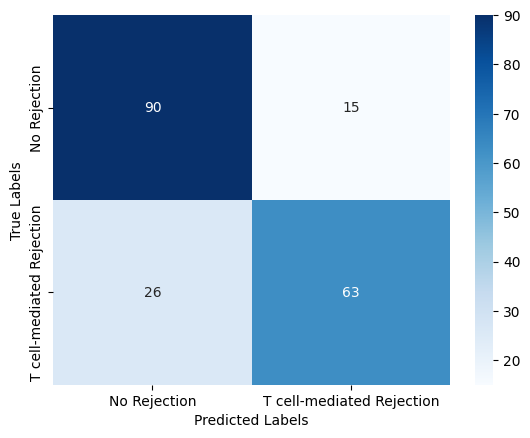

In [ ]:
sns.heatmap(cm_df,annot=True,cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

In [ ]:
def plot_roc_cur(fper, tper):
  plt.plot(fper, tper, color='orange', label='ROC')
  plt.plot([0, 1], [0,1], color='darkblue', linestyle='--')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic (ROC) Curve')
  plt.legend()
  plt.show()

In [ ]:
from sklearn import svm
linear_mdl = svm.SVC(kernel='linear', gamma='scale',C=1, probability=True).fit(X_train_selected, y_train)

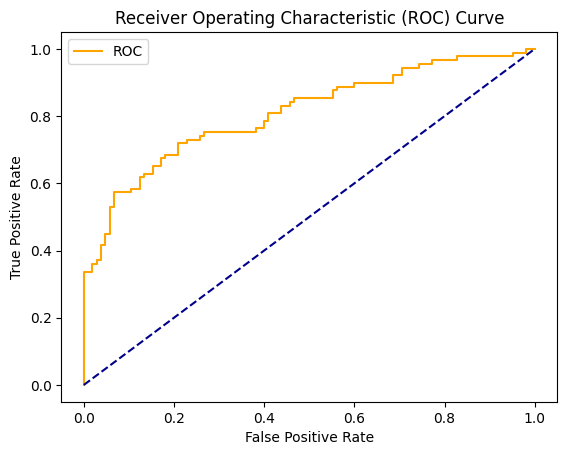

In [ ]:
probs = linear_mdl.predict_proba(X_test_selected)
probs = probs[:, 1]
fper, tper, thresholds = roc_curve(y_test, probs)
plot_roc_cur(fper, tper)

In [ ]:
from sklearn import metrics
auc = metrics.roc_auc_score(y_test, probs)
print(auc)

0.8093097913322632


In [ ]:
n_features = 10
selected_scores_indices = np.argsort(MI)[:n_features]
selected_scores_indices = selected_scores_indices.reshape(-1, 1)

In [ ]:
selected_feature_names = list(dataframe.columns[selected_scores_indices.flatten()])

In [ ]:
print("Most significant features based on mutual information:")
for feature_name in selected_feature_names:
    print(feature_name)

Most significant features based on mutual information:
SERTAD1
RAG2
TGIF1
MEGF11
RAF1
IL33
RAB40C
BMPER
PTPRO
CD83
